# Домашнее задание: бинарная классификация отзывов с помощью CNN

Применить CNN для анализа тональности текста (положительный/отрицательный отзыв)

Заполните пропущенный код (`### ВАШ КОД ЗДЕСЬ ###`). **Не меняйте структуру ячеек!** Все ответы и графики должны генерироваться автоматически

**Критерии проверки (максимум 10 баллов):**
*   **2 балла** — корректная загрузка и предобработка данных.
*   **3 балла** — корректно собранная модель по спецификации.
*   **2 балла** — успешное обучение модели (вывод истории обучения).
*   **3 балла** — оценка на тесте и выводы (accuracy > 0.85 даёт +1 балл).

---

## БЛОК 1: Загрузка данных

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.XEZIUB_1.0.0/imdb_reviews-train.tfrecor…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.XEZIUB_1.0.0/imdb_reviews-test.tfrecord…

Generating unsupervised examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.XEZIUB_1.0.0/imdb_reviews-unsupervised.…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.
Тренировочные данные: 25000 samples
Тестовые данные: 25000 samples


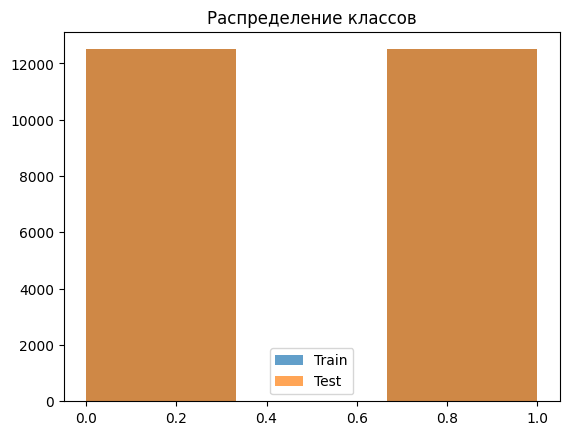

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds

# 1. Загрузите датасет IMDB Reviews (бинарная классификация)
### ВАШ КОД ЗДЕСЬ ###
datasets = tfds.load('imdb_reviews', split=['train', 'test'], as_supervised=True)
train_dataset, test_dataset = datasets

train_dataset = list(train_dataset.as_numpy_iterator())
test_dataset = list(test_dataset.as_numpy_iterator())


x_train = np.array([item[0].decode('utf-8') for item in train_dataset])
y_train = np.array([item[1] for item in train_dataset])

x_test = np.array([item[0].decode('utf-8') for item in test_dataset])
y_test = np.array([item[1] for item in test_dataset])


# Используйте tfds.load('imdb_reviews', split=['train', 'test'], as_supervised=True)
# Преобразуйте данные в numpy массивы (x_train, y_train), (x_test, y_test)


print(f"Тренировочные данные: {len(x_train)} samples")
print(f"Тестовые данные: {len(x_test)} samples")

# 2. Визуализируйте распределение классов
plt.hist(y_train, bins=3, alpha=0.7, label='Train')
plt.hist(y_test, bins=3, alpha=0.7, label='Test')
plt.legend()
plt.title('Распределение классов')
plt.show()

## БЛОК 2: Предобработка текста

In [2]:
# 3. Создайте текстовый векторзатор (TextVectorization)
# Ограничьте словарь 10_000 самых частых слов, максимальную длину последовательности — 200 слов
### ВАШ КОД ЗДЕСЬ ###
vectorizer = keras.layers.TextVectorization(max_tokens=10000, output_sequence_length=200)

# 4. Адаптируйте векторзатор на тренировочных текстах
### ВАШ КОД ЗДЕСЬ ###
vectorizer.adapt(x_train)

# 5. Примените векторзацию к данным
x_train_vec = vectorizer(x_train).numpy()
x_test_vec = vectorizer(x_test).numpy()

print(f"Размерность после векторизации: {x_train_vec.shape}")

Размерность после векторизации: (25000, 200)


## БЛОК 3: Построение модели

In [3]:
# 6. Постройте модель CNN для текста СТРОГО ПО СПЕЦИФИКАЦИИ:
#    - Вход: векторная последовательность (200,)
#    - Embedding: размерность 128, входной словарь 10_000
#    - Conv1D: 64 фильтра, размер ядра 5, активация 'relu'
#    - GlobalMaxPooling1D
#    - Dense: 32 нейрона, 'relu'
#    - Dense: 1 нейрон, 'sigmoid' (бинарная классификация)

model = keras.Sequential([
    keras.layers.Input(shape=(200,)),
    keras.layers.Embedding(input_dim=10000, output_dim=128),
    keras.layers.Conv1D(filters=64, kernel_size=5, activation='relu'),
    keras.layers.GlobalMaxPooling1D(),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 200, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 196, 64)        │        41,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ (None, 64)             │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,323,137 (5.05 MB)

 Trainable params: 1,323,137 (5.05 MB)

 Non-trainable params: 0 (0.00 B)

## БЛОК 4: Обучение

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 75ms/step - Precision: 0.6891 - Recall: 0.6005 - accuracy: 0.6826 - loss: 0.5559 - val_Precision: 0.8195 - val_Recall: 0.9075 - val_accuracy: 0.8520 - val_loss: 0.3300
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 73ms/step - Precision: 0.9256 - Recall: 0.9266 - accuracy: 0.9260 - loss: 0.1991 - val_Precision: 0.8446 - val_Recall: 0.9083 - val_accuracy: 0.8690 - val_loss: 0.3136
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 73ms/step - Precision: 0.9900 - Recall: 0.9891 - accuracy: 0.9896 - loss: 0.0505 - val_Precision: 0.8364 - val_Recall: 0.9091 - val_accuracy: 0.8640 - val_loss: 0.4080
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 77ms/step - Precision: 0.9998 - Recall: 0.9994 - accuracy: 0.9996 - loss: 0.0077 - val_Precision: 0.8643 - val_Recall: 0.8831 - val_accuracy: 0.8706 - val_loss: 0.4474
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - Precision: 1.0000 - Recall: 1.0000 - accuracy: 1.0000 - loss: 0.0011 - val_Precision: 0.9062 - val_Re

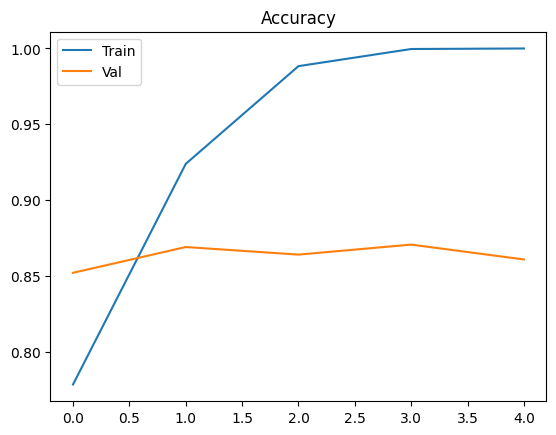

In [4]:
# 7. Скомпилируйте модель с оптимизатором 'adam', функцией потерь 'binary_crossentropy',
#    метриками ['accuracy', 'Precision', 'Recall']
### ВАШ КОД ЗДЕСЬ ###

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', 'Precision', 'Recall'])

# 8. Обучите модель на 5 эпох с validation_split=0.2, batch_size=32
### ВАШ КОД ЗДЕСЬ ###
history = model.fit(x_train_vec, y_train,
                    epochs=5,
                    validation_split=0.2,
                    batch_size=32)

# 9. Постройте график точности (accuracy) на обучении и валидации
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title('Accuracy')
plt.legend()
plt.show()


## БЛОК 5: Оценка

In [8]:
# 10. Оцените модель на тестовых данных
### ВАШ КОД ЗДЕСЬ ###
test_loss, test_acc, test_prec, test_rec = model.evaluate(x_test_vec, y_test, verbose=0)

print(f"Тестовая accuracy: {test_acc:.4f}")
print(f"Тестовая precision: {test_prec:.4f}")
print(f"Тестовая recall: {test_rec:.4f}")

# 11. Сделайте предсказания на первых 10 тестовых отзывах
#     и выведите: текст отзыва, истинный класс, предсказанный класс, вероятность
for i in range(10):
    text = x_test[i]
    true_label = "POS" if y_test[i] == 1 else "NEG"
    ### ВАШ КОД ЗДЕСЬ ###
    pred_prob = model.predict(np.expand_dims(x_test_vec[i], axis=0))
    pred_label = "POS" if pred_prob > 0.5 else "NEG"
    print(f"{text[:50]}... | True: {true_label} | Pred: {pred_label} ({pred_prob[0][0]:.2f})")

Тестовая accuracy: 0.8526
Тестовая precision: 0.9056
Тестовая recall: 0.7872
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
There are films that make careers. For George Rome... | True: POS | Pred: POS (0.98)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
A blackly comic tale of a down-trodden priest, Naz... | True: POS | Pred: POS (0.88)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Scary Movie 1-4, Epic Movie, Date Movie, Meet the ... | True: NEG | Pred: NEG (0.00)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Poor Shirley MacLaine tries hard to lend some grav... | True: NEG | Pred: NEG (0.00)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
As a former Erasmus student I enjoyed this film ve... | True: POS | Pred: POS (1.00)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
My God, Ryan Gosling has made a lot of deep charac... | True: POS | Pred: POS (1.00)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
This film just won the best film award at the Clev... | True: POS | Pred: POS (1.00)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
The cast for this produc

In [7]:
#дописала предыдущий код, чтобы полностью увидеть все отзывы (для ответа ниже на вопрос "Какой из 10 показанных отзывов был классифицирован неверно? Почему, на ваш взгляд?")
for i in range(10):
    print(x_test[i])
    print()

There are films that make careers. For George Romero, it was NIGHT OF THE LIVING DEAD; for Kevin Smith, CLERKS; for Robert Rodriguez, EL MARIACHI. Add to that list Onur Tukel's absolutely amazing DING-A-LING-LESS. Flawless film-making, and as assured and as professional as any of the aforementioned movies. I haven't laughed this hard since I saw THE FULL MONTY. (And, even then, I don't think I laughed quite this hard... So to speak.) Tukel's talent is considerable: DING-A-LING-LESS is so chock full of double entendres that one would have to sit down with a copy of this script and do a line-by-line examination of it to fully appreciate the, uh, breadth and width of it. Every shot is beautifully composed (a clear sign of a sure-handed director), and the performances all around are solid (there's none of the over-the-top scenery chewing one might've expected from a film like this). DING-A-LING-LESS is a film whose time has come.

A blackly comic tale of a down-trodden priest, Nazarin show

## БЛОК 6: Выводы

**Ответьте на вопросы в этой ячейке (текстом):**

1.  Какая итоговая точность (accuracy) на тесте?
2.  Что показывает разница между точностью на обучении и валидации? Есть ли переобучение?
3.  Какой из 10 показанных отзывов был классифицирован неверно? Почему, на ваш взгляд?

**Мои ответы:**
1. Итоговая точность на тесте равна 0.8526 (85,26%)
2. К 5 (последней) эпохе модель достигла 100% точности на тренировочных данных, но на валидационных остановилась на 85,26%. Эта разница в 14,74% показывает, что модель запомнила тренировочные данные, но не научилась обобщать (т.е. в целом переобучение есть).
3. Мне кажется, 10-й отзыв (последний) был классифицирован неверно, т.к. он, на самом деле, позитивный. Это может быть вызвано наличием в отзыве слов и конструкций с негативной эмоциональной окраской. Вероятно, этой особенностью отзыва и можно объяснить ошибку модели.